In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("House_Price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Select features and Target
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [4]:
print("Selected Features:")
X.head()

Selected Features:


,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [5]:
print("Target Variable:")
y.head()

Target Variable:


0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Training and Testing Data Shapes:
X_train: (436, 3)
X_test: (109, 3)


In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Make prediction on test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")

Model Evaluation Metrics:
R² Score: 0.456
MSE: 2750040479309.052


In [10]:
base_price = model.intercept_
print(f"Base Price (Intercept): ₹{base_price:.2f}")


Base Price (Intercept): ₹59485.38


In [11]:
# Predict New House Price
new_house = pd.DataFrame({'area': [2500], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_house)[0]
print("\nPredicted Price for given house:")
print(f"Area = 2500 sq.ft, Bedrooms = 3, Bathrooms = 2")
print(f"Predicted Price: ₹{predicted_price:.2f}")


Predicted Price for given house:
Area = 2500 sq.ft, Bedrooms = 3, Bathrooms = 2
Predicted Price: ₹4848384.07


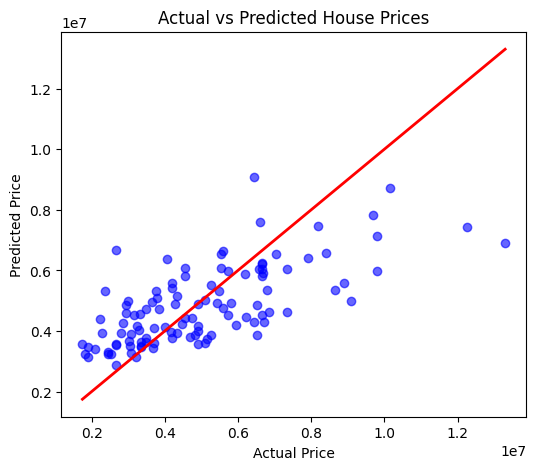

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()